# Визуализация данных. ДЗ в рамках курса Нетологии "Data Scientist: с нуля до middle"¶

In [1]:
#Обязательная часть
"""Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

    построить не менее 4 визуализаций различных видов;
    каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
    по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?)."""

#Дополнительная часть (необязательная)

"""    построить дополнительно не менее 2 визуализаций (итого не менее 6);
    в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
    """

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
import pandas as pd



#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
#Задаем стиль графиков
mpl.style.use(['ggplot'])
#plt.style.available



df = pd.read_csv('USA_cars_datasets.csv', index_col=0)
print(df.shape)
df.info()


(2499, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 253.8+ KB


In [2]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,price,year,mileage,lot
count,2499.00,2499.00,2499.00,2499.00
mean,18767.67,2016.71,52298.69,167691389.06
std,12116.09,3.44,59705.52,203877.21
min,0.00,1973.00,0.00,159348797.00
25%,10200.00,2016.00,21466.50,167625331.00
50%,16900.00,2018.00,35365.00,167745058.00
75%,25555.50,2019.00,63472.50,167779772.00
max,84900.00,2020.00,1017936.00,167805500.00


In [3]:
#Переведем данные по цене и пробегу в тысячи для наглядности
df.price =  df.price/1000
df.mileage = df.mileage/1000

#Уберем пробел из названия страны
df["country"] = df["country"].map(str.strip)

df

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6.30,toyota,cruiser,2008,clean vehicle,274.12,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2.90,ford,se,2011,clean vehicle,190.55,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5.35,dodge,mpv,2018,clean vehicle,39.59,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25.00,ford,door,2014,clean vehicle,64.15,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27.70,chevrolet,1500,2018,clean vehicle,6.65,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7.80,nissan,versa,2019,clean vehicle,23.61,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9.20,nissan,versa,2018,clean vehicle,34.55,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9.20,nissan,versa,2018,clean vehicle,31.59,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9.20,nissan,versa,2018,clean vehicle,32.56,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [18]:
#Динамика продаж по брендам автомобилей
filtered_df = df.query("country == 'usa'")
dynamics_by_brands = filtered_df.groupby('brand')['price'].sum().to_frame().reset_index().sort_values(by = 'price')
dynamics_by_brands

,brand,price
25,peterbilt,1.60
15,jaguar,2.80
27,toyota,6.30
26,ram,11.05
11,heartland,14.83
22,mazda,16.00
0,acura,21.80
21,maserati,30.30
20,lincoln,36.30
10,harley-davidson,54.68


Text(0, -25000, 'Вывод: \nИсходя из графика наиболее популярным брендом на рынке подержанных автомобилей в США \nявляется американский бренд Ford, вероятно, благодаря широкому модельному ряду(особенно среди пикапов), \nисторически сложившемуся доверию к бренду, доступным ценам.\nНаименее популярным оказался американский бренд peterbilt, \nзанимающийся выпуском классических грузовиков и седельных тягачей, которые имеют меньший спрос среди населения, \nпоскольку грузовики не так популярны среди среднестатистического населения и более требовательны в содержании.')

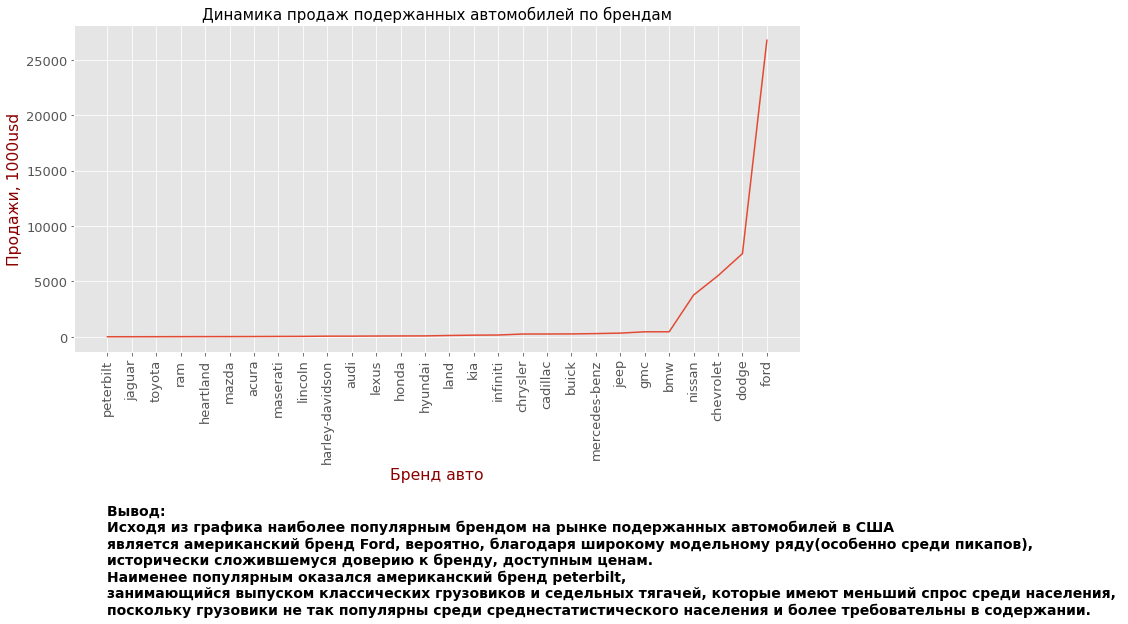

In [65]:

# применяем функцию plot из matplotlib 
y_formatter = plt.ticklabel_format(useOffset=False)
plt.plot(dynamics_by_brands.brand, dynamics_by_brands.price)
plt.xticks(rotation=90) 
plt.title('Динамика продаж подержанных автомобилей по брендам', fontsize=15)
plt.xlabel('Бренд авто', color='darkred')
plt.ylabel('Продажи, 1000usd', color='darkred')
plt.text(0,-25000, 'Вывод: \nИсходя из графика наиболее популярным брендом на рынке подержанных автомобилей в США \
\nявляется американский бренд Ford, вероятно, благодаря широкому модельному ряду(особенно среди пикапов), \
\nисторически сложившемуся доверию к бренду, доступным ценам.\
\nНаименее популярным оказался американский бренд peterbilt, \
\nзанимающийся выпуском классических грузовиков и седельных тягачей, которые имеют меньший спрос среди населения, \
\nпоскольку грузовики не так популярны среди среднестатистического населения и более требовательны в содержании.',horizontalalignment = 'left' , fontsize=14, fontweight="bold")


In [ ]:
#Вывод

# Исходя из графика наиболее популярным брендом на рынке подержанных автомобилей в США и Канаде 
# является американский бренд Ford, вероятно, благодаря широкому модельному ряду(особенно среди пикапов), 
# исторически сложившемуся доверию к бренду, доступным ценам.
# Наименее популярным оказался американский бренд peterbilt, 
# занимающийся выпуском классических грузовиков и седельных тягачей, которые имеют меньший спрос среди населения.

In [6]:
#Составим топ-5 самых продаваемых моделей Ford

top_model_car = (df.query("model not in ['door', 'doors']").groupby(['model','brand']).
                 agg({'price': 'sum'}).sort_values(by = 'price', ascending = False).head(5))
top_model_car

,,price
model,brand,
f-150,ford,6175.11
durango,dodge,1873.70
max,ford,1831.00
srw,ford,1722.60
caravan,dodge,1636.15


Text(0, -2000, 'Вывод: \nНаиболее продаваемыми подержанными автомобилями являются                   \nсeмейные типы автомобилей, рассчитанные на путешествия (пикапы, внедорожники, минивэны).')

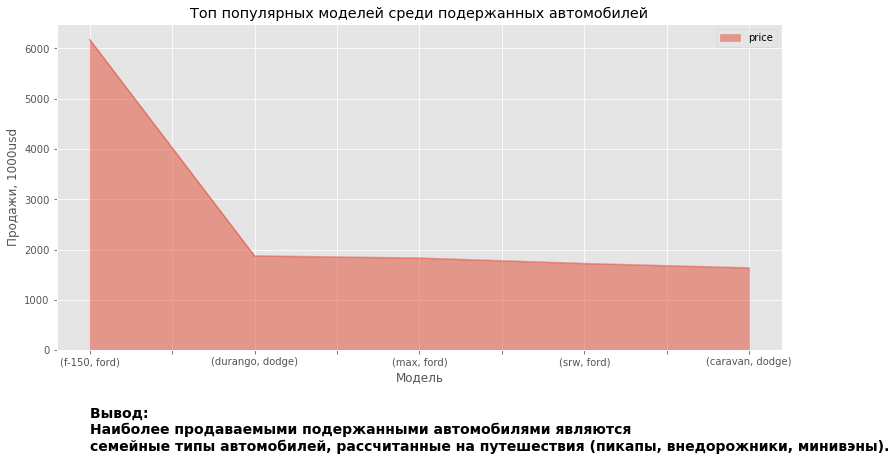

In [7]:
ax = top_model_car.plot(kind='area',
                             stacked=False,
                             title='Топ популярных моделей среди подержанных автомобилей',
                             xlabel = 'Модель',
                    
                             ylabel='Продажи, 1000usd')
ax.text(0,-2000,  'Вывод: \nНаиболее продаваемыми подержанными автомобилями являются  \
                 \nсeмейные типы автомобилей, рассчитанные на путешествия (пикапы, внедорожники, минивэны).',horizontalalignment = 'left' , fontsize=14, fontweight="bold")

Text(0.5, 1.0, 'Разброс цен автомобилей на вторичном рынке США')

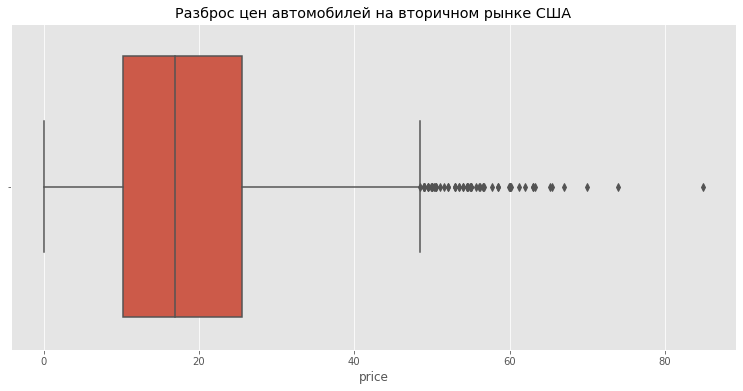

In [8]:
#sns.set_theme(style="whitegrid")
filtered_df = df.query("country == 'usa'")
b = sns.boxplot(x = filtered_df['price'])
b.set_title('Разброс цен автомобилей на вторичном рынке США')


In [23]:
#Вывод: 
#Средние значения цен на подержанные автомобили составляют чуть менее 20 тысяч долларов.
#При этом несколько машин были проданы по цене выше 60 тысяч долларов (единичный случай - выше 80 тысяч долларов).
#возможно, столь высокая цена обусловлена идеальным техническим состоянием автомобиля, 
#годом выпуска, раритетностью модели.

In [24]:
dynamics_by_years = filtered_df[filtered_df.year > 2015].groupby(['year', 'price'])['price'].count().reset_index(name = 'count')


dynamics_by_years

,year,price,count
0,2016,2.00,1
1,2016,2.50,1
2,2016,3.50,2
3,2016,3.65,1
4,2016,3.81,1
...,...,...,...
1028,2020,45.50,3
1029,2020,46.90,1
1030,2020,55.60,1
1031,2020,59.90,1


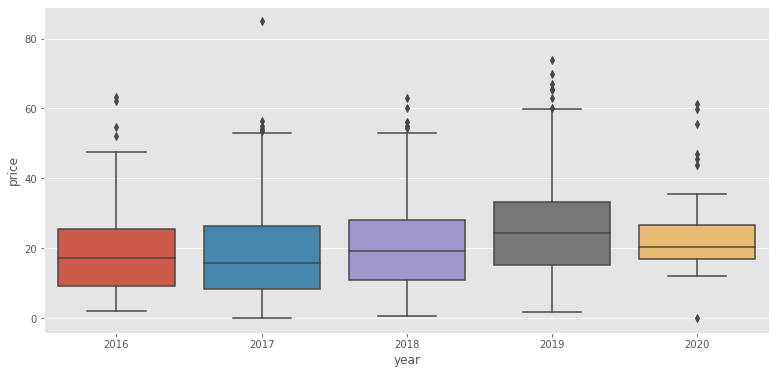

In [25]:
ax = sns.boxplot(x = dynamics_by_years.year, y = dynamics_by_years.price)

In [ ]:
#Вывод: 
#В разрезе годов выпуска автомобилей наиболее высокие средние цены характерны для автомобилей 2019 года.
# Вероятно, рост активности американских покупателей на вторичном рынке автомобилей обусловлен дефицитом, 
# коснувшимся новых автомобилей ввиду простоя в 2020г. заводов из-за пандемии короновируса, а также опасениями 
# ужесточения обстановки вокруг COVID-19.

Text(0.5, 1.02, 'Корреляционные зависимости между ценой, пробегом и годом выпуска автомобиля')

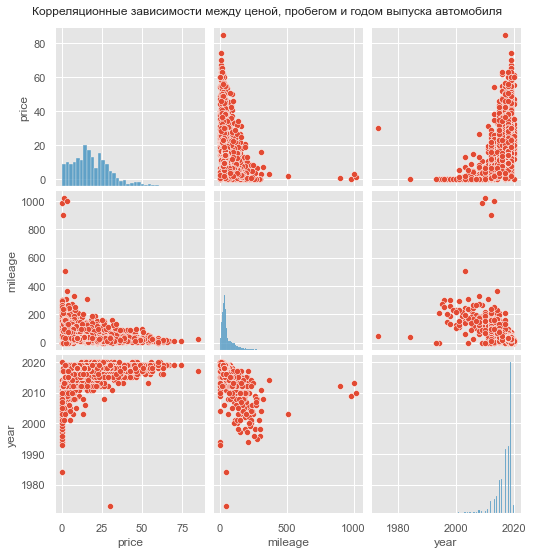

In [289]:
p = sns.pairplot(df[['price', 'mileage', 'year']])
p.fig.suptitle('Корреляционные зависимости между ценой, пробегом и годом выпуска автомобиля', y= 1.02)

In [ ]:
# Исходя из графиков, можно сделать вывод, что на цену подержанного автомобиля прямо 
# пропорционально влияет год выпуска(позже выпущен - выше цена)
# и обратно пропорционально - пробег (больше пробег - ниже цена)

In [32]:
#Составим топ-5 наиболее продаваемых авто по цвету
top_color_car1 = (filtered_df.groupby(['color','brand']).
                agg({'price': 'sum'}).sort_values(by = 'price', ascending = False))

top_color_car = top_color_car1[top_color_car1.price > 0].head(5)

top_color_car

,,price
color,brand,
white,ford,8684.48
black,ford,6321.89
gray,ford,3594.62
silver,ford,2423.11
red,ford,2010.25


<AxesSubplot:title={'center':'Топ-5 наиболее продаваемых автомобилей на вторичном рынке США в разрезе цвета'}>

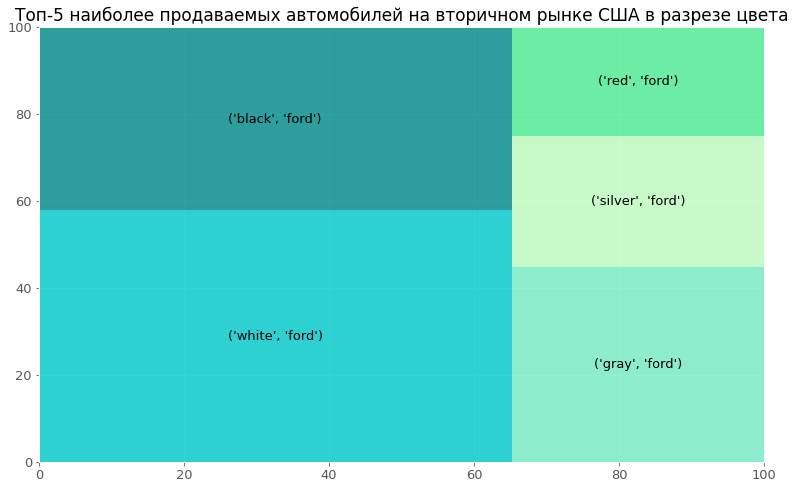

In [34]:
import squarify

plt.figure(figsize=(13,8))
plt.title('Топ-5 наиболее продаваемых автомобилей на вторичном рынке США в разрезе цвета', fontsize=17)
plt.rc('font', size=13) 
labels = top_color_car.index
sizes = top_color_car['price'].values.tolist()
squarify.plot(sizes=sizes, label=labels, color = ['#00CDCD' ,'#008B8B', '#76EEC6', '#C1FFC1', '#4EEE94' ], alpha = .8)

In [ ]:
#Вывод:
#Наиболее продаваемым автомобилем на вторичном рынке США является белый Ford.
#Вероятно, это обусловлено тем, что белых автомобилей в целом больше, поскольку этот цвет не требует доплаты.

In [35]:
top5_mileage1 = df[['brand', 'model', 'mileage']].groupby(['model', 'brand'])['mileage'].max().reset_index(name = 'max_mileage').sort_values(by = 'max_mileage', ascending = False)
top5_mileage = top5_mileage1.query("model not in ['door', 'doors']").head(5)
top5_mileage 

,model,brand,max_mileage
162,truck,peterbilt,1017.94
126,pickup,chevrolet,507.99
12,cab,ford,309.56
128,pickup,ford,295.78
33,cruiser,toyota,274.12


Text(0.5, 1.0, 'Топ-5 моделей авто с максимальным пробегом')

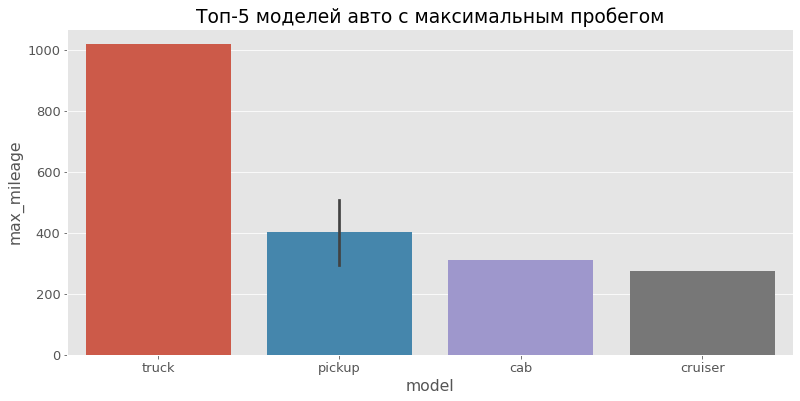

In [37]:
s = sns.barplot(x="model", y="max_mileage", data=top5_mileage )
s.set_title('Топ-5 моделей авто с максимальным пробегом')

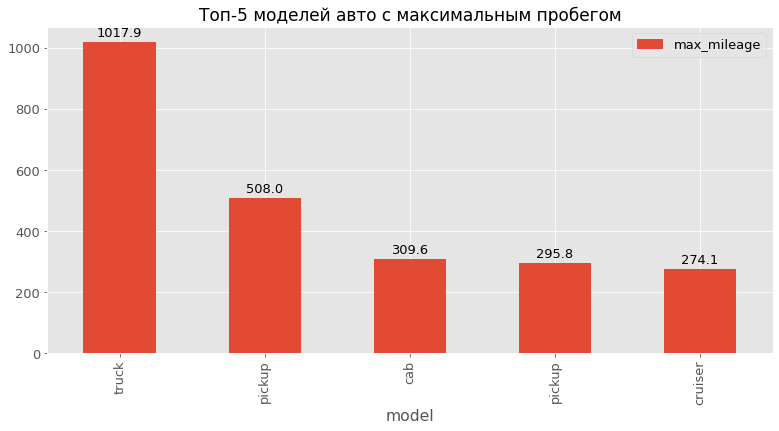

In [38]:

ax = top5_mileage.plot(kind='bar', x = 'model')
plt.title('Топ-5 моделей авто с максимальным пробегом', fontsize=17)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9),
               textcoords = 'offset points')

In [ ]:
#Вывод:
# Модели автомобилей, характеризующиеся высоким пробегом, исходя из построенного графика, 
# относятся к автомобилям, предпочтительно использующимся для поездок на дальние расстояния, 
# либо для профессиональной деятельности. 
# Можно предположить, что цены на данные автомобили ниже средних.

Text(0.5, 1.0, 'Распределение по пробегу продаваемых автомобилей')

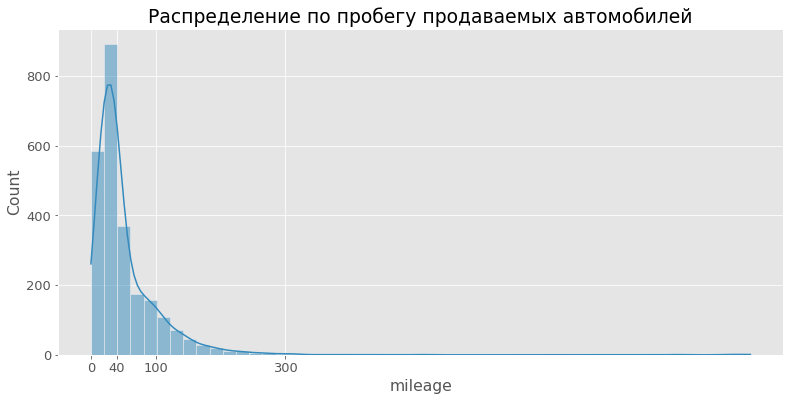

In [63]:
ax = sns.histplot(filtered_df.mileage, kde = True, bins=50)
ax.set_xticks([0, 40, 100, 300])
ax.set_title('Распределение по пробегу продаваемых автомобилей')

In [ ]:
#Вывод:
# Исходя из графика, можно предположить, что чаще всего продаются автомобили с пробегом менее 40 тысяч миль (~64 тыс.км). 
#Возможно, именно столько проезжает среднестатистическая американская семья 
#до появления новой модели автомобиля на рынке (в течение 2-3 лет)

In [274]:
df["country"] = df["country"].map(str.strip)
filtered_df = df.query("country == 'usa'")
top_state = filtered_df['state'].value_counts().sort_values(ascending = False).head(10).index.values
top_state

array(['pennsylvania', 'florida', 'texas', 'california', 'michigan',
       'north carolina', 'minnesota', 'illinois', 'wisconsin', 'virginia'],
      dtype=object)

In [275]:
state_sales = df[df.state.isin(top_state)].pivot_table(
                        index = 'state', 
                        columns = 'brand', 
                        values = 'price', 
                        aggfunc = sum).fillna(0)
state_sales


brand,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,gmc,...,jeep,kia,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt
state,,,,,,,,,,,,,,,,,,,,,
california,0.00,0.00,101.00,0.00,0.00,313.52,0.00,586.85,1562.45,216.09,...,0.00,16.51,68.70,10.84,36.30,0.00,0.00,103.64,369.82,0.00
florida,16.90,0.00,2.92,44.50,0.00,294.04,14.27,348.48,1701.45,0.00,...,13.29,0.00,46.90,55.60,0.00,30.30,16.00,150.20,882.15,0.57
illinois,0.00,0.00,15.00,29.00,0.00,166.30,0.00,791.10,1912.88,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,104.60,0.00
michigan,1.00,0.00,196.00,20.11,158.21,554.78,26.50,461.80,2508.90,1.05,...,110.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
minnesota,0.00,0.00,0.00,0.00,0.00,0.45,0.00,380.88,844.55,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,933.90,0.00
north carolina,0.00,0.00,0.00,0.00,0.00,225.80,0.17,1032.10,866.60,0.00,...,161.60,47.80,0.00,0.00,0.00,0.00,0.00,0.00,72.78,0.00
pennsylvania,0.00,0.00,0.00,0.00,0.00,277.20,7.35,1181.99,5040.34,107.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,176.60,0.00
texas,3.90,19.52,35.90,26.70,0.00,356.22,5.43,356.56,1941.46,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,106.70,0.00
virginia,0.00,0.00,0.00,0.00,0.00,0.03,0.00,186.90,1305.78,68.12,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,149.40,0.00


Text(0.5, 1.0, 'Карта продаж автомобилей по штатам США')

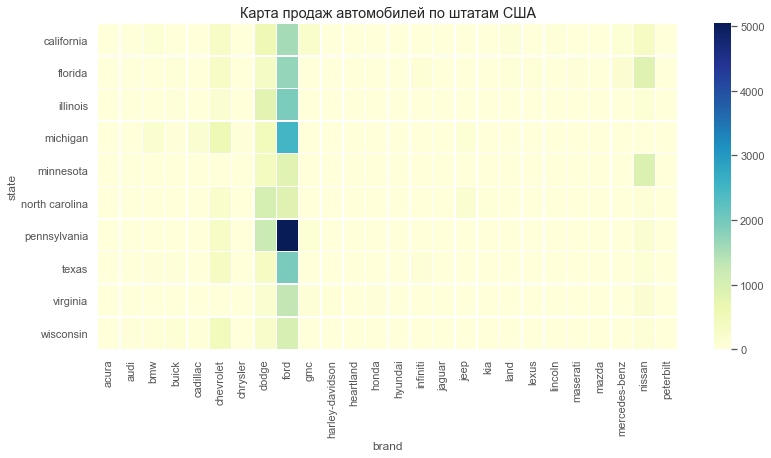

In [282]:
h = sns.heatmap(state_sales, cmap="YlGnBu", linewidths=.5)
h.set_title('Карта продаж автомобилей по штатам США')

In [ ]:
 #Вывод:
# Исходя из графика, машины бренда Ford (а значит максимальные продажи) наиболее популярны в штатах Пенсильвания и Мичиган.
# Возможно, потому что 90% штата Пенсильвания - это горная местность, а значит пикапы forda, 
# зарекомендовавшие себя как надежные и мощные, здесь наиболее распространены. 
# Примечательно, что именно в Пенсильвании находится Ford City, 
# основанный компанией Pittsburgh Plate Glass Company и названный в честь основателя Джона Батиста Форда, 
# но не относящийся к Генри Форду и Ford Motor Company.

# Относительно высоких продаж автомобилей ford штате Мичиган, можно предположить, что 
# поскольку Ford Motor Company расположена в Мичигане, значит в данном штате много сотрудников Ford Motor Company,
# которые, вероятно, имеют скидки на продукцию.